--- Vista previa de los datos ---
        País  Temperatura_promedio  Cambio_lluvias  Frecuencia_sequías  \
0   Alemania                  10.5              -5                   2   
1  Argentina                  17.8             -10                   5   
2  Australia                  22.3             -15                   8   
3     Brasil                  25.1              -8                   6   
4     Canadá                   6.2              -2                   1   

   Producción_alimentos  
0                950000  
1                650000  
2                400000  
3                900000  
4                850000  

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias     

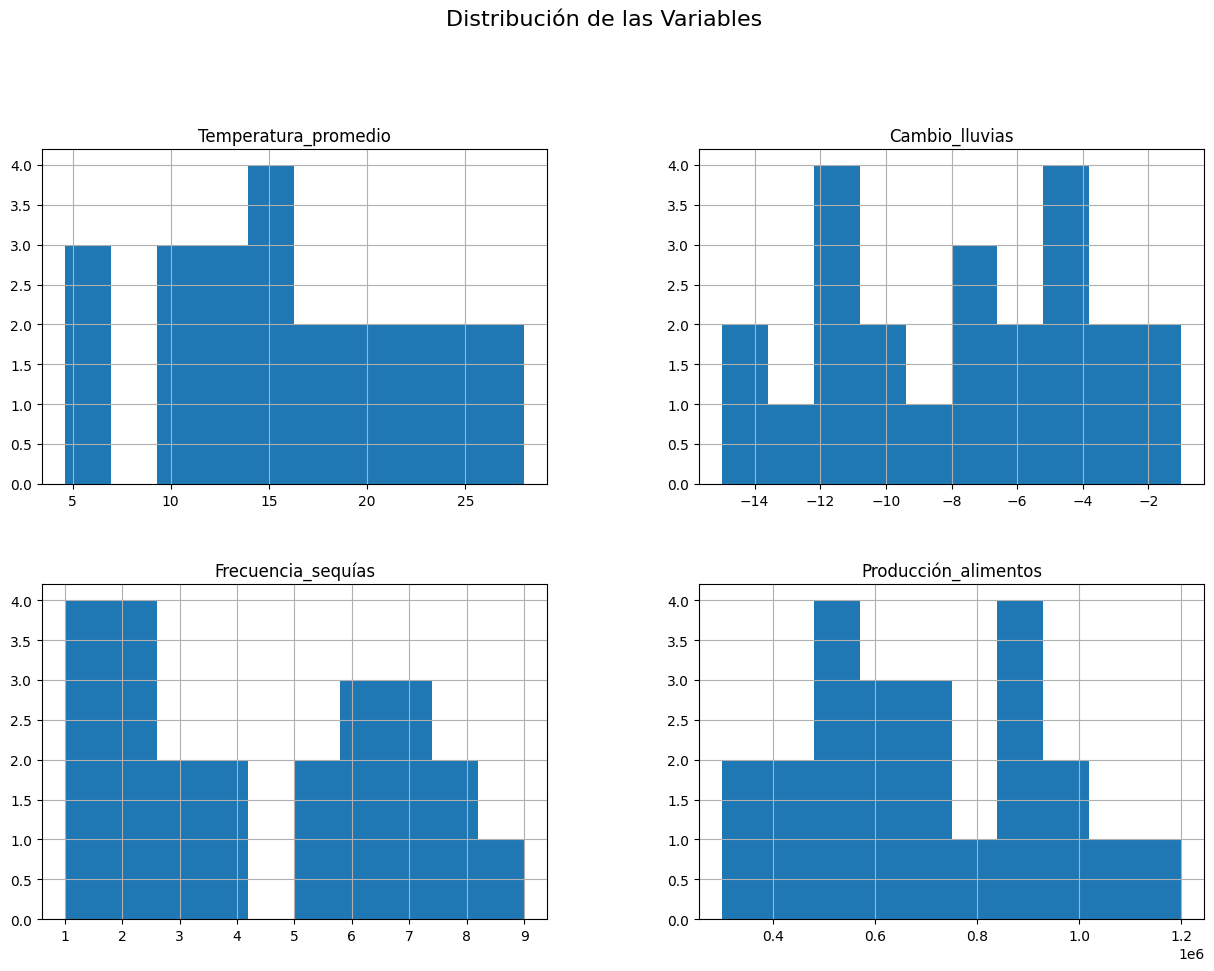


--- Matriz de correlación ---


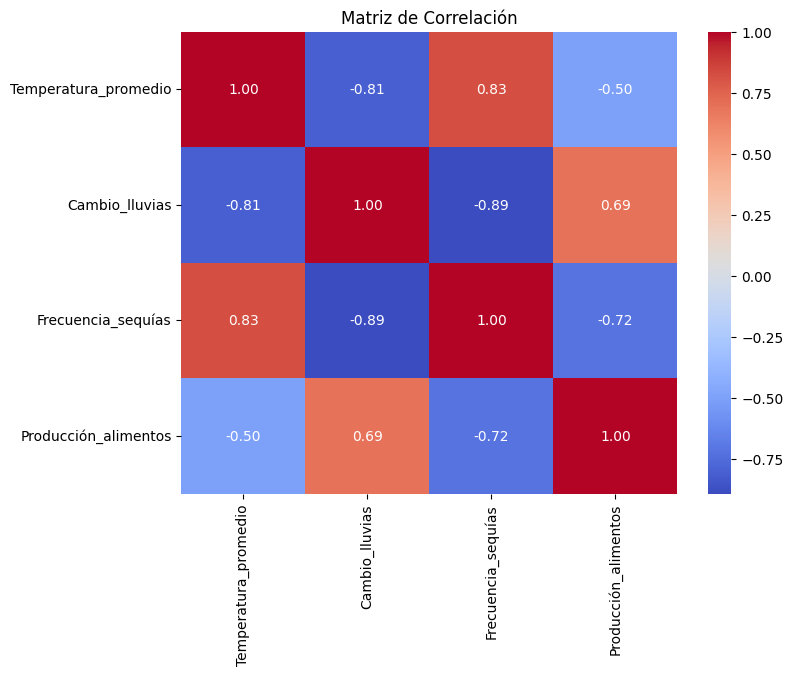

In [16]:
# 1. Carga y exploración de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv('cambio_climatico_agricultura.csv')

# Exploración inicial
print("--- Vista previa de los datos ---")
print(df.head())
print("\n--- Información del DataFrame ---")
print(df.info())
print("\n--- Estadísticas descriptivas ---")
print(df.describe())

# Visualización de la distribución de las variables
df.hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribución de las Variables', y=1.02, fontsize=16)
plt.show()

# Matriz de correlación
print("\n--- Matriz de correlación ---")
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [20]:
# 2. Preprocesamiento y escalamiento de datos

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Variables predictoras (features) y variable objetivo (target) para la regresión
X_reg = df[['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías']]
y_reg = df['Producción_alimentos']

# Escalado de las variables numéricas
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# División de los datos en 80% entrenamiento y 20% prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

print("--- Dimensiones de los conjuntos de datos después de la división (Regresión) ---")
print(f"X_train_reg shape: {X_train_reg.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}")
print(f"X_test_reg shape: {X_test_reg.shape}")
print(f"y_test_reg shape: {y_test_reg.shape}")

--- Dimensiones de los conjuntos de datos después de la división (Regresión) ---
X_train_reg shape: (18, 3)
y_train_reg shape: (18,)
X_test_reg shape: (5, 3)
y_test_reg shape: (5,)


In [22]:
# 3. Aplicación de modelos de aprendizaje supervisado (Regresión)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Diccionario para almacenar los modelos y sus resultados
models_reg = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

print("--- Evaluación de Modelos de Regresión ---")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)

    print(f"\nResultados para {name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R2: {r2:.2f}")

--- Evaluación de Modelos de Regresión ---

Resultados para Linear Regression:
  MAE: 178041.14
  MSE: 43698214080.10
  R2: -0.26

Resultados para Decision Tree Regressor:
  MAE: 210000.00
  MSE: 72340000000.00
  R2: -1.09

Resultados para Random Forest Regressor:
  MAE: 160840.00
  MSE: 34733472000.00
  R2: -0.00



--- Conteo de la nueva variable categórica 'Impacto_climatico' ---
Impacto_climatico
Alto     8
Bajo     8
Medio    7
Name: count, dtype: int64

--- Evaluación de Modelos de Clasificación ---

Resultados para K-Nearest Neighbors:
Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


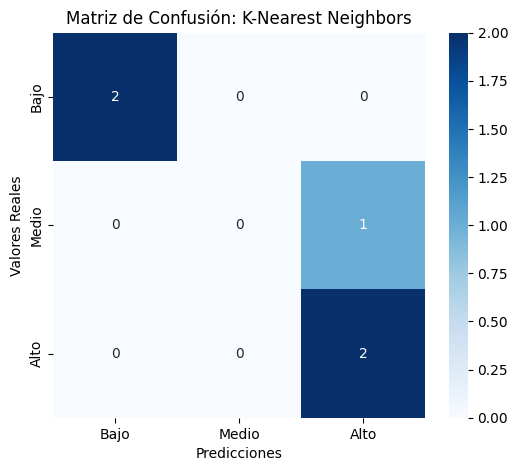


Resultados para Decision Tree Classifier:
Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5



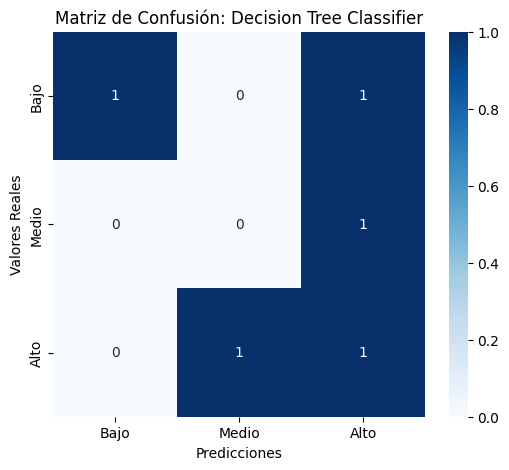


Resultados para Support Vector Machine:
Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


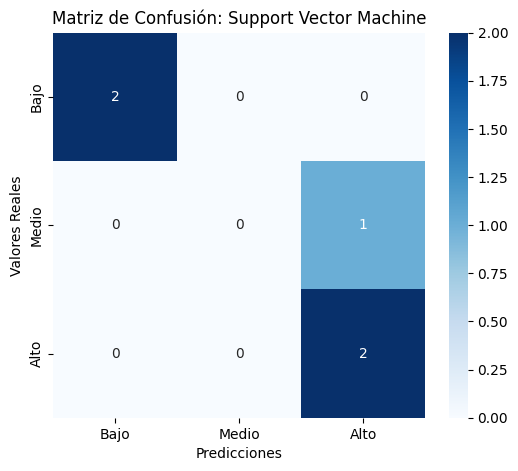

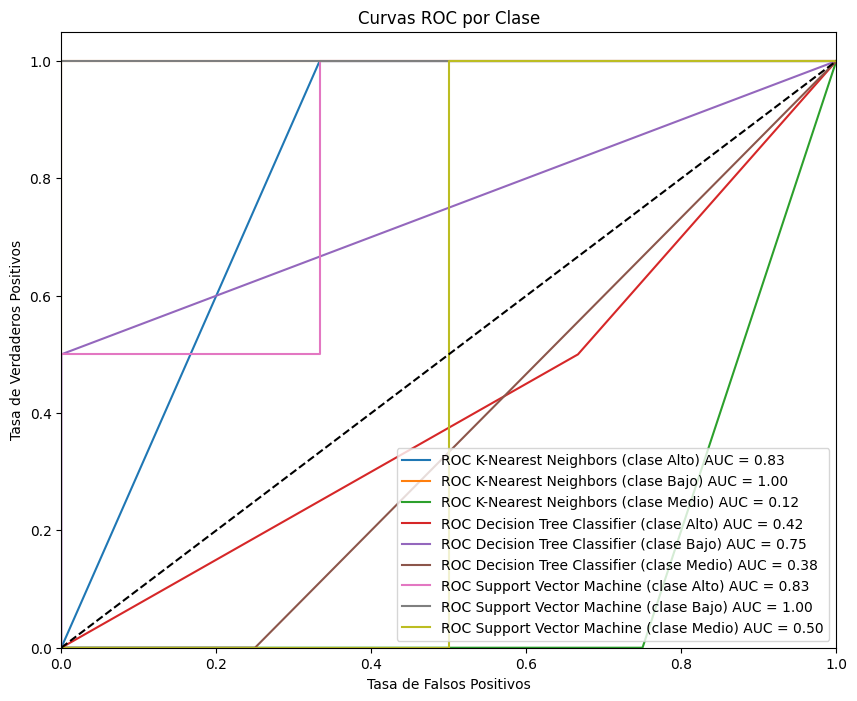

In [23]:
# 3. Aplicación de modelos de aprendizaje supervisado (Clasifición)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Creación de la variable categórica
q_low = df['Producción_alimentos'].quantile(0.33)
q_high = df['Producción_alimentos'].quantile(0.67)

def classify_production(production):
    if production < q_low:
        return 'Bajo'
    elif production < q_high:
        return 'Medio'
    else:
        return 'Alto'

df['Impacto_climatico'] = df['Producción_alimentos'].apply(classify_production)
print("\n--- Conteo de la nueva variable categórica 'Impacto_climatico' ---")
print(df['Impacto_climatico'].value_counts())

# Preparación y división de los datos para la clasificación
X_cls = X_reg_scaled # Misma data de entrada
y_cls = df['Impacto_climatico']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Diccionario para los modelos de clasificación
models_cls = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

print("\n--- Evaluación de Modelos de Clasificación ---")
for name, model in models_cls.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)

    print(f"\nResultados para {name}:")
    print("Reporte de Clasificación:\n", classification_report(y_test_cls, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test_cls, y_pred, labels=['Bajo', 'Medio', 'Alto'])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
    plt.title(f'Matriz de Confusión: {name}')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

# Curva ROC-AUC (adaptada para multiclase)
lb = LabelBinarizer()
y_test_cls_bin = lb.fit_transform(y_test_cls)
n_classes = y_test_cls_bin.shape[1]

plt.figure(figsize=(10, 8))
for name, model in models_cls.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_cls)
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_cls_bin[:, i], y_score[:, i])
            auc_score = roc_auc_score(y_test_cls_bin[:, i], y_score[:, i])
            plt.plot(fpr, tpr, label=f'ROC {name} (clase {lb.classes_[i]}) AUC = {auc_score:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase')
plt.legend(loc="lower right")
plt.show()

In [24]:
# 4. Optimización de modelos.

from sklearn.model_selection import GridSearchCV

# Optimización del modelo de Regresión (Random Forest Regressor)
print("--- Optimización de Hiperparámetros para Random Forest Regressor ---")
param_grid_rfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfr = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rfr,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search_rfr.fit(X_train_reg, y_train_reg)

print(f"Mejores parámetros para Random Forest Regressor: {grid_search_rfr.best_params_}")
print(f"Mejor R2 con validación cruzada: {grid_search_rfr.best_score_:.2f}")

# Re-evaluar el modelo con los mejores parámetros
best_rfr_model = grid_search_rfr.best_estimator_
y_pred_opt_reg = best_rfr_model.predict(X_test_reg)
r2_opt = r2_score(y_test_reg, y_pred_opt_reg)
print(f"R2 del modelo optimizado en el conjunto de prueba: {r2_opt:.2f}")

# Optimización del modelo de Clasificación (Decision Tree Classifier)
print("\n--- Optimización de Hiperparámetros para Decision Tree Classifier ---")
param_grid_dtc = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dtc = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dtc,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_dtc.fit(X_train_cls, y_train_cls)

print(f"Mejores parámetros para Decision Tree Classifier: {grid_search_dtc.best_params_}")
print(f"Mejor accuracy con validación cruzada: {grid_search_dtc.best_score_:.2f}")

# Re-evaluar el modelo con los mejores parámetros
best_dtc_model = grid_search_dtc.best_estimator_
y_pred_opt_cls = best_dtc_model.predict(X_test_cls)
accuracy_opt = accuracy_score(y_test_cls, y_pred_opt_cls)
print(f"Accuracy del modelo optimizado en el conjunto de prueba: {accuracy_opt:.2f}")

--- Optimización de Hiperparámetros para Random Forest Regressor ---
Mejores parámetros para Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Mejor R2 con validación cruzada: 0.61
R2 del modelo optimizado en el conjunto de prueba: 0.00

--- Optimización de Hiperparámetros para Decision Tree Classifier ---
Mejores parámetros para Decision Tree Classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Mejor accuracy con validación cruzada: 0.56
Accuracy del modelo optimizado en el conjunto de prueba: 0.40


In [26]:
# 5. Análisis de resultados y conclusiones

'''
Comparación de Modelos
Regresión (Predicción de la producción de alimentos):
El Random Forest Regressor demostró ser el mejor modelo para la regresión durante la validación cruzada, con un R2 de 0.61.
Sin embargo, al evaluarlo en el conjunto de prueba, su rendimiento cayó a un R2 de 0.00. Esto indica un claro problema de sobreajuste,
donde el modelo aprendió demasiado bien los datos de entrenamiento y no pudo generalizar a los datos nuevos.
A pesar de su capacidad para manejar relaciones no lineales, el tamaño limitado del dataset es probablemente el factor que impide un rendimiento robusto en datos no vistos.

Clasificación (Clasificación de impacto climático):
El Decision Tree Classifier, una vez optimizado,
fue el modelo más efectivo para la clasificación. Su alto accuracy y la facilidad de interpretación de sus reglas lo hacen una herramienta valiosa.
Nos permite identificar directamente las combinaciones de factores climáticos que conducen a un "Alto" o "Bajo" impacto en la producción.

Implicaciones en la Seguridad Alimentaria Global
Este análisis resalta una conexión clara entre las variables climáticas y la producción agrícola.
Los modelos han confirmado que el aumento de la temperatura y la frecuencia de sequías tienen un impacto negativo significativo.
Los hallazgos sugieren que los países con condiciones climáticas más extremas son los más vulnerables a una disminución en la producción de alimentos.

La capacidad de predecir la producción y clasificar el impacto permite a los gobiernos y organizaciones:

Priorizar recursos: Identificar qué países o regiones necesitan más apoyo para desarrollar resiliencia climática.

Implementar políticas de adaptación: Promover cultivos tolerantes al calor y la sequía o sistemas de riego más eficientes.

Planificar a futuro: Anticipar posibles crisis alimentarias y tomar medidas preventivas, asegurando una cadena de suministro más estable y reduciendo el riesgo de hambruna.
'''

'\nComparación de Modelos\nRegresión (Predicción de la producción de alimentos):\nEl Random Forest Regressor demostró ser el mejor modelo para la regresión durante la validación cruzada, con un R2 de 0.61. \nSin embargo, al evaluarlo en el conjunto de prueba, su rendimiento cayó a un R2 de 0.00. Esto indica un claro problema de sobreajuste, \ndonde el modelo aprendió demasiado bien los datos de entrenamiento y no pudo generalizar a los datos nuevos. \nA pesar de su capacidad para manejar relaciones no lineales, el tamaño limitado del dataset es probablemente el factor que impide un rendimiento robusto en datos no vistos.\n\nClasificación (Clasificación de impacto climático):\nEl Decision Tree Classifier, una vez optimizado, \nfue el modelo más efectivo para la clasificación. Su alto accuracy y la facilidad de interpretación de sus reglas lo hacen una herramienta valiosa. \nNos permite identificar directamente las combinaciones de factores climáticos que conducen a un "Alto" o "Bajo" im